**为什么不用tensorboard或者wandb?**

tensorboard需要开端口权限，服务器开发环境有时候没有端口权限~

wandb需要联网，有时候网速很差或者没有网，影响体验~

综合对比考虑如下表

|日志方案    | 学习成本|  指标直观性 |是否需要端口权限|是否需要联网 |推荐星级|
|:---------|:------:|:-------------:|:---------:|:---------:|:-----|
|print      | 无需学习 |不直观,易刷屏|不需要    |不需要     |⭐️|
|tensorboard| 较难学习 |比较直观,跨页面      |需要       |不需要     |⭐️⭐️|
|wandb      | 较好学习 |比较直观,跨页面      |不需要     |需要       |⭐️⭐️⭐️⭐️|
|VLog😋     | 极易学习 |非常直观,同页面      |不需要     |不需要      |⭐️⭐️⭐️⭐️⭐️|

# 基本原理

VLog类主要有以下5个方法。

```python

from merlin.tools import VLog

#1, 初始化方法
vlog = VLog(epochs=20, monitor_metric='val_loss', monitor_mode='min') 

#2, 显示开始空图表
vlog.log_start()

#3, 更新step级别日志
vlog.log_step({'train_loss':0.003,'val_loss':0.002}) 

#4, 更新epoch级别日志
vlog.log_epoch({'train_acc':0.9,'val_acc':0.87,'train_loss':0.002,'val_loss':0.03})

#5, 输出最终稳定状态图表
vlog.log_end()
```


In [1]:
import math
import os
import random
import sys
import time
from pathlib import Path
DIR_PATH = str(Path(os.getcwd()).parent.parent)
sys.path.append(DIR_PATH)

import merlin
from merlin.tools import VLog

In [2]:
epochs = 10
batchs = 30

# 指定监控北极星指标，以及指标优化方向
vlog = VLog(
    epochs, 
    monitor_metric="val_loss", 
    monitor_mode="min", 
    save_path=DIR_PATH + '/merlin/assets/images/tools_02_vlog.png'
)

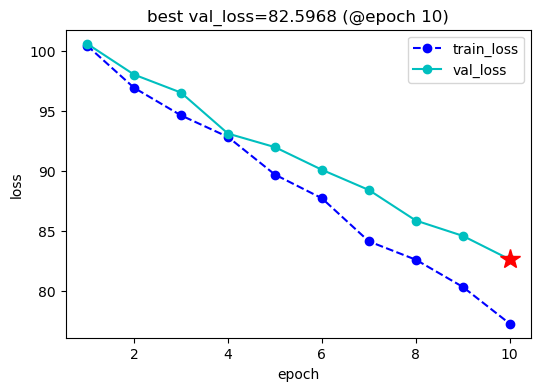

In [3]:
# 初始化动态图表
vlog.log_start()

In [4]:
for epoch in range(epochs):
    
    #train
    for step in range(batchs):
        
        # 2. log_step 更新step级别日志信息，打日志，并用小进度条显示进度
        vlog.log_step({'train_loss':100-2.5*epoch+math.sin(2*step/batchs)}) 
        time.sleep(0.05)
        
    #eval    
    for step in range(20):

        # 3. log_step 更新step级别日志信息，指定training=False说明在验证模式，只打日志不更新小进度条
        vlog.log_step({'val_loss':100-2*epoch+math.sin(2*step/batchs)}, training=False)
        time.sleep(0.05)

    # 4. log_epoch 更新epoch级别日志信息，每个epoch刷新一次动态图表和大进度条进度
    vlog.log_epoch({'val_loss':100 - 2*epoch+2*random.random()-1,
                    'train_loss':100-2.5*epoch+2*random.random()-1})

In [5]:
# 5, log_end 调整坐标轴范围，输出最终指标可视化图表
dfhistory = vlog.log_end()
dfhistory

,val_loss,train_loss,epoch
0,100.595941,100.446546,1
1,98.021615,96.920803,2
2,96.518086,94.617664,3
3,93.097739,92.817858,4
4,91.966725,89.677435,5
5,90.078011,87.701087,6
6,88.390737,84.104772,7
7,85.842268,82.573600,8
8,84.563907,80.306555,9
9,82.596801,77.232395,10
